In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd ../data

/Users/alex/Galvanize/Work_Done/projects/Capstone_Projects/SunSpots/data


Files downloaded from SilSo (http://www.sidc.be/silso/dayssnplot)

SN_d_tot_V2.0.csv
SN_ms_tot_V2.0.csv

In [3]:
sun = pd.read_csv('SN_d_tot_V2.0.csv', sep = ';')
sun.columns = ['Year', 'Month', 'Day', 'Fractional Date', 'SunSpot Count', "DailyStDev", "Observations", 'Indicator']

sun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73960 entries, 0 to 73959
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             73960 non-null  int64  
 1   Month            73960 non-null  int64  
 2   Day              73960 non-null  int64  
 3   Fractional Date  73960 non-null  float64
 4   SunSpot Count    73960 non-null  int64  
 5   DailyStDev       73960 non-null  float64
 6   Observations     73960 non-null  int64  
 7   Indicator        73960 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 4.5 MB


In [4]:
sun.head()

,Year,Month,Day,Fractional Date,SunSpot Count,DailyStDev,Observations,Indicator
0,1818,1,2,1818.004,-1,-1.0,0,1
1,1818,1,3,1818.007,-1,-1.0,0,1
2,1818,1,4,1818.010,-1,-1.0,0,1
3,1818,1,5,1818.012,-1,-1.0,0,1
4,1818,1,6,1818.015,-1,-1.0,0,1


I don't really need three columns when I can combine them and conver them to datetime

In [5]:
sun['Date'] = sun['Year'].map(str)+ '-' + sun['Month'].map(str) + '-' + sun['Day'].map(str)
sun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73960 entries, 0 to 73959
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             73960 non-null  int64  
 1   Month            73960 non-null  int64  
 2   Day              73960 non-null  int64  
 3   Fractional Date  73960 non-null  float64
 4   SunSpot Count    73960 non-null  int64  
 5   DailyStDev       73960 non-null  float64
 6   Observations     73960 non-null  int64  
 7   Indicator        73960 non-null  int64  
 8   Date             73960 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 5.1+ MB


In [6]:
pd.to_datetime(sun['Date'], utc=False)

0       1818-01-02
1       1818-01-03
2       1818-01-04
3       1818-01-05
4       1818-01-06
           ...    
73955   2020-06-26
73956   2020-06-27
73957   2020-06-28
73958   2020-06-29
73959   2020-06-30
Name: Date, Length: 73960, dtype: datetime64[ns]

Drop the year, month and day columns and set a new order

In [7]:
sun = sun[['Date', 'SunSpot Count', 'DailyStDev', 'Observations', 'Indicator', 'Fractional Date'] ]
sun

,Date,SunSpot Count,DailyStDev,Observations,Indicator,Fractional Date
0,1818-1-2,-1,-1.0,0,1,1818.004
1,1818-1-3,-1,-1.0,0,1,1818.007
2,1818-1-4,-1,-1.0,0,1,1818.010
3,1818-1-5,-1,-1.0,0,1,1818.012
4,1818-1-6,-1,-1.0,0,1,1818.015
...,...,...,...,...,...,...
73955,2020-6-26,6,0.3,22,0,2020.485
73956,2020-6-27,4,0.9,12,0,2020.488
73957,2020-6-28,0,0.0,27,0,2020.490
73958,2020-6-29,0,0.0,37,0,2020.493


This plot below seems a little supicious. I haven't summed up any of the data but have what appears to be summations. Also, I'm not clear on what the part in white would be.

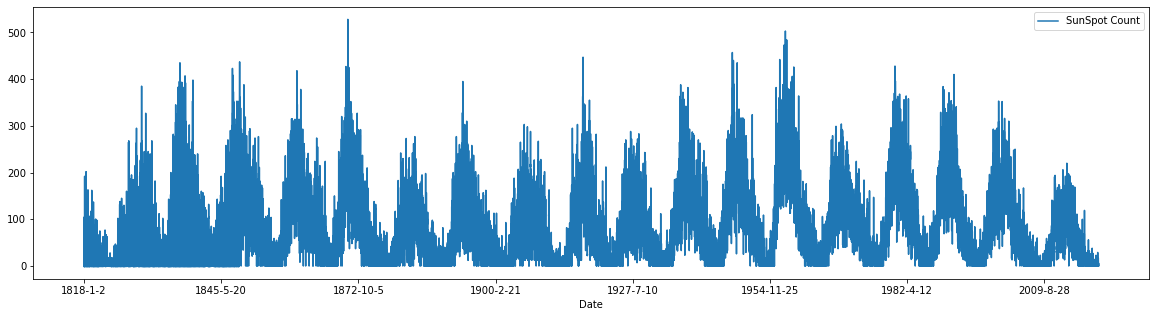

In [8]:
plt.figure(figsize = (20, 5))
ax = plt.gca()

sun.plot(kind='line', x='Date', y='SunSpot Count', ax=ax)
plt.show()

In [9]:
sun.describe()

,SunSpot Count,DailyStDev,Observations,Indicator,Fractional Date
count,73960.000000,73960.000000,73960.000000,73960.000000,73960.000000
mean,78.998053,6.902599,4.529597,0.998770,1919.250429
std,77.468362,4.786447,8.085959,0.035056,58.455787
min,-1.000000,-1.000000,0.000000,0.000000,1818.004000
25%,15.000000,2.900000,1.000000,1.000000,1868.626250
50%,58.000000,6.500000,1.000000,1.000000,1919.252000
75%,124.000000,10.000000,1.000000,1.000000,1969.873500
max,528.000000,77.700000,60.000000,1.000000,2020.496000


Hunh. Well, that would seem to dispel my first concern. 

This is a good place to stop for the night. I think I want to look about casting the indicator as a bool and Observations and total SunSpots as integers. That should be faster, take less memory, and should be a bit clearer.


In [10]:
sun['Indicator'] = sun['Indicator'].astype(bool)
sun[['Observations', 'SunSpot Count']] = sun[['Observations', 'SunSpot Count']].astype(int)

In [33]:
window = 1000
sun['rolling'] = sun.iloc[:,1].rolling(window).mean()



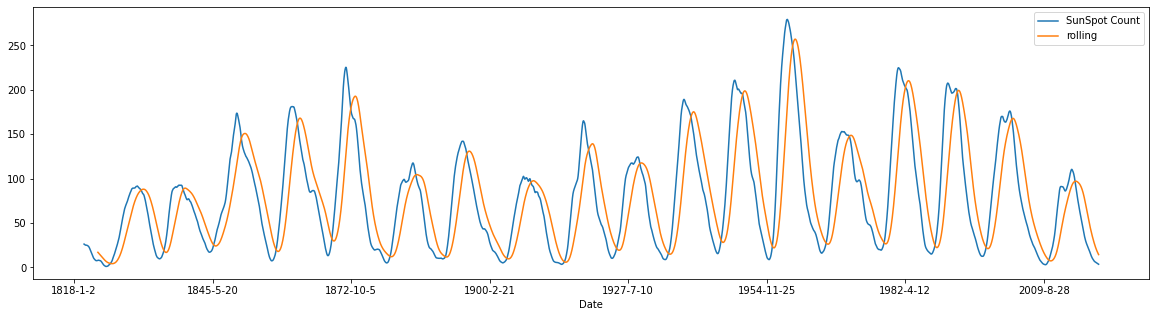

In [34]:
plt.figure(figsize = (20, 5))
ax = plt.gca()

sun.plot(kind='line', x='Date', y='SunSpot Count', ax=ax)
sun.plot(kind='line', x='Date', y='rolling', ax=ax)

plt.show()